In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#loading the Bangalore house dataset
df = pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Data Cleaning

In [3]:
#Dropping the columns which are not required
df = df.drop(['area_type','availability','society','balcony'],axis='columns')

In [4]:
#Checking if dataframe has rows with null enteries
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
#Deleting the rows with null enteries as their count is much less than the total number of rows in the dataset.
df = df.dropna()

In [6]:
#Checking if rows with null values have been deleted successfully
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
#Cleaning of size column 
df['bhk']=df['size'].apply(lambda x:int(x.split(' ')[0]))
df['bhk']
df = df.drop(['size'],axis='columns')

In [8]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [9]:
#Cleaning the values in total_sqft Column
def sqft_cleaning(x):
    ls = x.split('-')
    if len(ls)==2:
        return (float(ls[0])+float(ls[1]))/2
    try:
        return float(ls[0])
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(sqft_cleaning)
df['total_sqft'].unique()


array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

# Feature Engineering

In [10]:
#Adding new feature Price per Square feet
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [11]:
#Removing extra spacing from location and changing it to lower case
df['location'] = df['location'].apply(lambda x:x.strip())
df['location'] = df['location'].apply(lambda x:x.lower())


In [12]:
#Counting the number of unique locatios and number of locations who have less than or equal to 10 enteries in the dataset
loc_stats = df['location'].value_counts(ascending = False)
print(len(df['location'].unique()))
print(len(loc_stats))
print(len(loc_stats[loc_stats<10]))

1282
1282
1028


In [13]:
#Reducing the number of locations by setting it to other if that location has less or equal to 10 enteries in datset
df['location'] = df['location'].apply(lambda x: 'other' if loc_stats[x]<=10 else x)
len(df['location'].unique())

242

# Outlier Removal

In [14]:
#Removing rows where size of a bedroom is greater than 300 sqft
df = df[(df['total_sqft']/df['bhk'])>=300]
df.shape

(12456, 6)

In [15]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,111.187960,2.649004,6308.502826
std,1260.404795,1.080275,152.203367,0.976046,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [16]:
#Removing outliers from price per square feet
def rem_price_per_sqft_outliers(df):
    newdf = pd.DataFrame()
    for key,locdf in df.groupby('location'):
        m = np.mean(locdf['price_per_sqft'])
        sd = np.std(locdf['price_per_sqft'])
        red_df = locdf[(locdf['price_per_sqft']>(m-sd)) & (locdf['price_per_sqft']<(m+sd))]
        newdf = pd.concat([newdf,red_df],ignore_index = True)
    return newdf

df2 = rem_price_per_sqft_outliers(df)
df2.shape


(10241, 6)

In [17]:
#Scatter plot for Total Square Feet Area v/s Price for 2 BHK and 3 BHK 
def my_scatter_plot(df,loc):
    bhk2 = df[(df['location']==loc) & (df.bhk==2)]
    bhk3 = df[(df['location']==loc) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='orange',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title("Scatter Plot for "+loc)
    plt.legend()
    

In [18]:
#Remove those apartments whose price_per_sqft is less than mean price_per_sqft of one less BHK apartment
def rem_bhk(df):
    ex_ind = np.array([])
    for loc, locdf in df.groupby('location'):
        bhk_details = {}
        for bhk, bhkdf in locdf.groupby('bhk'):
            bhk_details[bhk] = {
                'mean': np.mean(bhkdf['price_per_sqft']),
                'std': np.std(bhkdf['price_per_sqft']),
                'count': bhkdf.shape[0]
            }
        for bhk, bhkdf in locdf.groupby('bhk'):
            curr = bhk_details.get(bhk-1)
            if curr and curr['count']>5:
                ex_ind = np.append(ex_ind, bhkdf[bhkdf['price_per_sqft']<curr['mean']].index.values)
    return df.drop(ex_ind,axis='index')
df3 = rem_bhk(df2)
df3.shape

(7329, 6)

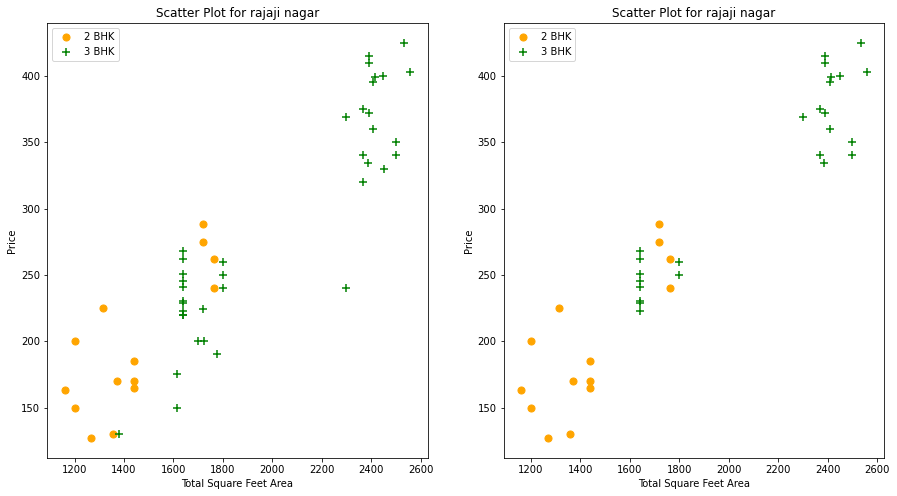

In [19]:
#Comparing results for Rajaji Nagar before and after outlier removal
matplotlib.rcParams['figure.figsize'] = (15,8)
plt.subplot(1,2,1)
my_scatter_plot(df2,"rajaji nagar")
plt.subplot(1,2,2)
my_scatter_plot(df3,"rajaji nagar")


(7251, 6)

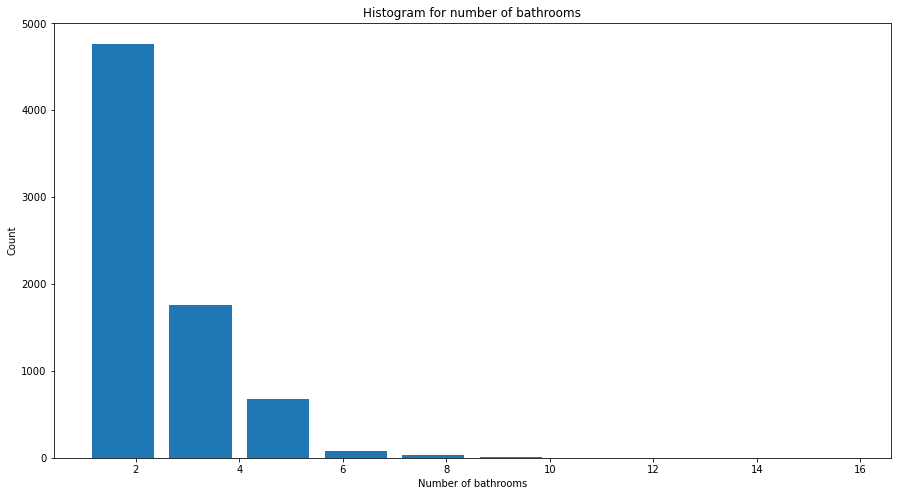

In [20]:
#Removal of rows where number of bathrooms are greater than 2 more the number of BHK
plt.hist(df3.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.title("Histogram for number of bathrooms")
df4 = df3[df3.bath<df3.bhk+2]
df4.shape

In [21]:
#Dropping price per sqft column because it is no longer required
df4 = df4.drop(['price_per_sqft'],axis='columns')

# One Hot Encoding for Location

In [22]:
#Removing Location Column by using one hot encoding
dummies = pd.get_dummies(df4['location'])
df5 = pd.concat([df4,dummies.drop('other',axis='columns')],axis='columns')
len(df5['location'].unique())

242

In [23]:
finaldf = df5.drop(['location'],axis='columns')
finaldf

,total_sqft,bath,price,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,1195.0,2.0,100.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10231,1692.0,3.0,108.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,2500.0,5.0,185.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,1855.0,3.0,135.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Building Model

In [24]:
from sklearn.model_selection import train_test_split
X = finaldf.drop(['price'],axis='columns')
y = finaldf['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [25]:
#Using pycaret to know which model works best for our dataset
from pycaret.regression import *
setup(data = finaldf, target='price', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,17.6211,1046.2426,31.9115,0.8393,0.3343,0.2060,0.1500
ridge,Ridge Regression,17.5260,1060.3489,32.0837,0.8378,0.3158,0.2008,0.0450
gbr,Gradient Boosting Regressor,19.3570,1174.1607,33.8513,0.8233,0.2680,0.2252,1.1270
rf,Random Forest Regressor,18.7393,1271.6256,35.3757,0.8051,0.2546,0.2014,3.3240
omp,Orthogonal Matching Pursuit,20.5726,1328.0894,36.1465,0.7939,0.2869,0.2278,0.0380
et,Extra Trees Regressor,18.9786,1395.0525,36.9343,0.7887,0.2595,0.2016,5.2580
lightgbm,Light Gradient Boosting Machine,20.1303,1639.8727,39.8729,0.7581,0.2608,0.2063,0.2540
dt,Decision Tree Regressor,20.5572,1704.5038,40.9848,0.7322,0.2847,0.2147,0.1310
huber,Huber Regressor,21.6006,2061.9527,44.7846,0.6930,0.2887,0.2129,0.9660
lasso,Lasso Regression,24.1853,2174.1071,46.0207,0.6727,0.3335,0.2613,0.0500


In [26]:
#Best Model is Bayesian Ridge
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X, y)
clf.score(X_test, y_test)

0.8939492868719412

In [27]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return clf.predict([x])[0]

In [28]:
predict_price('Rajaji Nagar'.lower(),1000, 2, 2)

221.3870326247079

# Exporting our model as a pickle file

In [29]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(clf,f)